<a href="https://colab.research.google.com/github/hadiprasetiyo/posttest1_datamining/blob/semester_4/B_2109116070_POSTTEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)



In [94]:
import pandas as pd
import seaborn as sns

In [95]:
df = pd.read_csv("market_basket.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# 1 Item set
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [97]:
# Itemnya ada apa aja si
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate',
       'frozen meals', 'dental care', 'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [98]:
# 2 Item set
from itertools import permutations

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [99]:
# Filter yang ada isinya aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [100]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [101]:
len(df)

19

In [102]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene artic

In [103]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yog

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

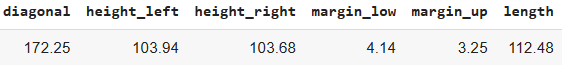
<!-- 1412 -->

Menampilkan Data



In [104]:
import pandas as pd

df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


1.   Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan





In [105]:
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
jarak = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    jarak.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = jarak

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


2.   Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)



In [106]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


3.   Menentukan hasil prediksi berdasarkan label terbanyak





In [107]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=K)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Hasil = "+ ' '.join(map(str, prediksi)))
     

Hasil = True


# (3) Analisis

> Nama : Hadi Prasetiyo

> Nim : 2109116070


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

Analisis dengan menggunakan struktur CRISP-DM





# Business Understanding



1.   Pemahaman Bisnis

Perusahaan ini dapat menggunakan data ini untuk melakukan analisis premi asuransi mereka dan membuat penyesuaian harga berdasarkan data.

2.   Menilai Situasi

Kasus ini adalah perusahaan asuransi yang sedang beradaptasi dengan memanfaatkan teknologi baru berdasarkan data.

3.   Menentukan Tujuan

Tujuan data ini dibuat untuk melakukan prediksi terhadap biaya premi asuransi, memahami penjaminan risiko dalam asuransi kesehatan dan melihat bagaimana pengaruhnya terhadap premi asuransi.

4.   Membuat Rencana Proyek

Rencana proyek ini adalah menentukan permasalahan bagaimana dataset ini akan membantu permasalahan pada perusahaan ini, mengumpulkan dan melakukan data cleaning, melakukan data exploration, membuat model prediksi dan mengevaluasi efektivitas dari model prediksi atau solusi.




# Data Understanding

> **Mengumpulkan Data Awal**

Data yang dikumpulkan dari dataset adalah data dari hasil observasi pemilik dataset yang telah di upload pada Kaggle.



**Deskripsi Data**


*   Usia (Age)
*   Jenis Kelamin (Sex)
*   Body Mass Index (BMI)
*   Jumlah anak yang dicover oleh asuransi (Children)
*   Merokok atau Tidak Merokok (smoker)
*   Daerah (Region)
*   Biaya yang ditagih oleh asuransi (Charges)




**Data Exploration**

Dataset ini berisi 1338 baris data dan menggunakan atribut dataset campuran variabel numerik dan kategori.

In [145]:
import pandas as pd

In [146]:
df3 = pd.read_csv("asuransi_perusahaan.csv")
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
import plotly.express as px

In [139]:
px.pie(df3, names = "sex")

<Axes: xlabel='region', ylabel='count'>

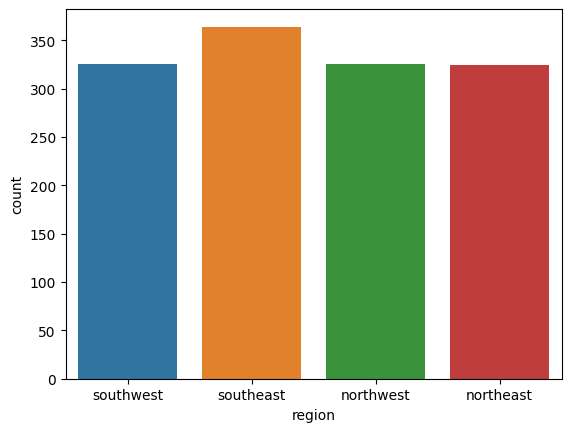

In [133]:
sns.countplot(data=df3,x="region")

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

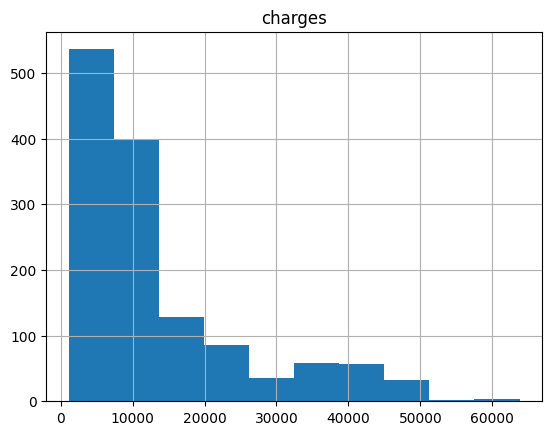

In [138]:
df3.hist("charges")

> Verifikasi Data

Dari dataset yang sudah disajikan, tidak ditemukannya data yang error.

# Data Preparation



> Memilih Data

Mengetahui faktor yang mempengaruhi premi asuransi, variabel yang relevan adalah jenis kelamin, usia, BMI, merokok/tidak merokok dan tagihan asuransi.


In [141]:
df3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500



> Menyusun Data

Dibawah ini merupakan construct data dengan metode transform, metode ini akan mengganti categori data dengan angka

In [143]:
import numpy as np
import pandas as pd 

df3 = pd.read_csv("asuransi_perusahaan.csv")
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [148]:
df3_categorical = df3.select_dtypes(exclude=[np.number])
df3_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [150]:
df3_categorical['sex'].unique()

array(['female', 'male'], dtype=object)

In [151]:
df3_categorical.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [153]:
df3_categorical.sex.replace({"female":1, "male":2}, inplace= True)
df3_categorical.smoker.replace({"yes":1, "no":2}, inplace= True)

In [155]:
df3_categorical.head()

,sex,smoker,region
0,1,1,southwest
1,2,2,southeast
2,2,2,southeast
3,2,2,northwest
4,2,2,northwest




> Mengintegrasi Data

Pada kasus ini hanya memiliki satu dataset yang sudah berisi semua data yang relevan untuk analisis Anda, maka integrasi data mungkin tidak diperlukan.

